# NYPD Motor Vehicle Collision Data<a id='Top'></a>

### Overview

The "Motor Vehicle Collisions - Crashes" dataset available through New York City's OpenData program contains information about reported vehicle crashes in NYC. Each row contains details on a single crash event. 

The data contains records from 2012 to today, with data updated on a daily basis. At the time of this writing, there are 1.59 million rows, each row representing a crash event, and over 29 columns which represent date, time, borough, zip code, latitude, etc...

In this notebook we will analyze this data as follows:

1. [Importing](#Importing)
2. [Understanding](#Understanding)
    - [Column Contents](#column_contents)
    - [Descriptive Statistics](#descriptive_statistics)
    - [Columns Missing Data](#empty)
3. [Transforming](#Transforming)
    - [Dropping Columns](#Drop)
    - [Renaming Data](#Renaming)
    - [Redundant Columns](#Redundant)
    - [Data Types](#data_type)
    - [Categorizing](#categorizing)
4. [Analyzing](#Analyzing)
5. [Visualizing](#Visualizations)
    - [Fatal crash frequency over time](#Fatality_Time_Scatterplot)
    - [Contributing factors to crash fatalities](#Factor_Bar_Plot)
    - [Fatalities to pedestrians vs cyclists vs motorist](#Fataity_Grouped_Series)
    - [Number of deaths by borough](#Fataities_by_borough)
    - [Number of deaths by hour](#Fataities_by_hour)
    - [Crash Factor Percentages in Queens](#queens_crash_causes)
6. [End of Document](#Bottom)


* The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### Importing the Data<a id='Importing'></a>

Let's begin by importing a few libraries we will use later in the notebook, and then bring the first two million rows of NYPD Motor Vehicle Collision Data using pandas. We are over-estimating the number of rows, to leave room for more data if this is run in the future.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [2]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000")

/Users/leidner/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


And let's pull up the data dictionary supplied by the OpenData website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info')
data_dict.head()

,Data Dictionary - Column Information,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes \n(where applicable, includes..."
1,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
2,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
3,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
4,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN


### Understanding the Data <a id='Understanding'></a>
Let's look the first few rows of the dataset. 

In [4]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
datanyc.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2919091,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN


... And get some overall information about the contents of the data. <a id='column_contents'></a>

In [5]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600038 entries, 0 to 1600037
Data columns (total 29 columns):
date                             1600038 non-null object
time                             1600038 non-null object
borough                          1115106 non-null object
zip_code                         1114912 non-null object
latitude                         1404135 non-null float64
longitude                        1404135 non-null float64
location                         1404135 non-null object
on_street_name                   1286755 non-null object
off_street_name                  1065533 non-null object
cross_street_name                221118 non-null object
number_of_persons_injured        1600021 non-null float64
number_of_persons_killed         1600007 non-null float64
number_of_pedestrians_injured    1600038 non-null int64
number_of_pedestrians_killed     1600038 non-null int64
number_of_cyclist_injured        1600038 non-null int64
number_of_cyclist_killed        

Each column should therotically contain approxamitely 1.6 million values. There are some columns with considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to 4 decimal place.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.31
zip_code                         30.32
latitude                         12.24
longitude                        12.24
location                         12.24
on_street_name                   19.58
off_street_name                  33.41
cross_street_name                86.18
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.43
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.33
vehicle_type_code2       

Wow! Some columns have a lot of missing values. 

For some it makes sense. `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` may be missing simply because there were no second or third vehicle or factors contributing to the collision.  Other than those, for example `borough` column has 30% of its values missing. 

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. We will take a closer look at them when we start transforming our data.

For now, we will use the `describe` function to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

In [7]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.404135e+06,1.404135e+06,1.600021e+06,1.600007e+06,1.600038e+06,1.600038e+06,1.600038e+06,1.600038e+06,1.600038e+06,1.600038e+06,1.600038e+06
mean,4.069426e+01,-7.387677e+01,2.625728e-01,1.167495e-03,5.050443e-02,6.312350e-04,2.082138e-02,8.437300e-05,1.913917e-01,4.543642e-04,2.769031e+06
std,1.101651e+00,2.287245e+00,6.600770e-01,3.612315e-02,2.315786e-01,2.570674e-02,1.439587e-01,9.252886e-03,6.224473e-01,2.319280e-02,1.505629e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397722e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.027459e+06
50%,4.072258e+01,-7.392986e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.436142e+06
75%,4.076796e+01,-7.386702e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.836383e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.237285e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns? The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of the empty `latitude` columns using the `isnull` function. <a id='empty'></a>

In [8]:
datanyc[datanyc['latitude'].isnull()].head(20)

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2919091,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
11,2012-07-01T00:00:00.000,9:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,2896726,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
15,2018-09-14T00:00:00.000,23:30,NaN,NaN,NaN,NaN,NaN,TIDES LANE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3982170,Sedan,NaN,NaN,NaN,NaN
17,2012-07-01T00:00:00.000,8:03,NaN,NaN,NaN,NaN,NaN,EASTERN PARKWAY,BUSHWICK AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,184520,OTHER,OTHER,NaN,NaN,NaN
20,2012-07-01T00:00:00.000,8:43,NaN,NaN,NaN,NaN,NaN,HORACE HARDING EXPRESSWAY,UTOPIA PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,233142,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN
29,2012-07-01T00:00:00.000,9:20,NaN,NaN,NaN,NaN,NaN,FOOD CENTER DRIVE,HALLECK STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,76204,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN,NaN
35,2012-07-01T00:00:00.000,8:30,NaN,NaN,NaN,NaN,NaN,WEST 181 STREET,RIVERSIDE DRIVE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,70031,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we *really* had some time, we would write/find a program to reverse map the on_street_name to the other fields.

For now, we'll pivot to take a closer look at vehicle types.

In [9]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  153232
Station Wagon/Sport Utility Vehicle    123879
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15850
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10311
Box Truck                                8071
Bus                                      6640
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3939
Name: vehicle_type_code1, dtype: int64

In [10]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10379
Station Wagon/Sport Utility Vehicle     8577
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     657
Pick-up Truck                            583
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                194
Bus                                      118
Motorcycle                               100
Name: vehicle_type_code_3, dtype: int64

We believe we have a decent understanding of our data. In the next section we will modify the column names to standardize the dataset, deal with missing values, clean duplications, and generally get our dataset to the point where we use it confidently

## Transforming the Data
 <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as vehicle_type_code_4, contributing_factor_vehicle_5) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. collision_id, on_street_name, off_street_name, cross_street_name) so we can drop them completely. 


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicated rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* 'Latitude' and 'longitude' columns seem to be contained in the 'location' column. We like keeping the two values separate for now, so we can probably remove 'location' later.

#### [Data Types](#data_type)
* The values that we expect to be 'datetime' type are object ('date' and 'time' columns). We'll fix those.
* We will change the data type of zip code to string.

#### [Categorizing](#categorizing)
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

## Dropping Columns  <a id='Drop'></a>
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [11]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [12]:
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what clean_nyc looks like now, as far as data types and number of columns (and values in those columns):

In [13]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600038 entries, 0 to 1600037
Data columns (total 19 columns):
date                             1600038 non-null object
time                             1600038 non-null object
borough                          1115106 non-null object
zip_code                         1114912 non-null object
latitude                         1404135 non-null float64
longitude                        1404135 non-null float64
location                         1404135 non-null object
number_of_persons_injured        1600021 non-null float64
number_of_persons_killed         1600007 non-null float64
number_of_pedestrians_injured    1600038 non-null int64
number_of_pedestrians_killed     1600038 non-null int64
number_of_cyclist_injured        1600038 non-null int64
number_of_cyclist_killed         1600038 non-null int64
number_of_motorist_injured       1600038 non-null int64
number_of_motorist_killed        1600038 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [14]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

date                              0.00
time                              0.00
borough                          30.31
zip_code                         30.32
latitude                         12.24
longitude                        12.24
location                         12.24
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.43
vehicle_type_code1                0.33
vehicle_type_code2               16.47
dtype: float64

So far, so good.

## Correcting Misspellings and Renaming  <a id='Renaming'></a>

We will modify the column names to standardize the dataset using the rename function.

In [15]:
clean_nyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at vehicle_type_code_1.

In [16]:
clean_nyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  153232
Station Wagon/Sport Utility Vehicle    123879
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    15850
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
LIVERY VEHICLE                          10481
Pick-up Truck                           10311
Box Truck                                8071
Bus                                      6640
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     3939
Tractor Truck Diesel                     3541
Van                               

It looks like there are misspellings and duplicates. Let's see if we can combine some of the obvious missspellings.

In [17]:
clean_nyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('TAXI', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Bike', 'BICYCLE', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorscooter', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Moped', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('MOTORCYCLE', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Refrigerated Van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorbike', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CAB', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Cab', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Taxi', 'taxy', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('taxy', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AM', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CONV', 'Convertible', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Garbage or Refuse', 'Dump', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('OTHER', 'UNKNOWN', inplace=True)
clean_nyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               437385
Sedan                             153232
taxi                               66521
UNKNOWN                            43911
Pick-up Truck                      33380
Van                                30321
Bus                                20697
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9507
Motorcycle                          8642
Box Truck                           8074
Ambulance                           3987
Tractor Truck Diesel                3541
TK                                  2485
BU                                  2229
Dump                                1941
Convertible                         1744
FIRE TRUCK                          1055
DS                                  1006
4 dr sedan                           859
PK                                   834
Flat Bed        

Now let's look at contributing_factor_vehicle_1.

In [18]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Fatigued/Drowsy', 'Unsafe Lane Changing', 'Lost Consciousness',
       'Other Vehicular', 'Unspecified', 'Backing Unsafely', 'Glare',
       'Driver Inattention/Distraction', 'Traffic Control Disregarded',
       'Illness', 'View Obstructed/Limited', 'Driver Inexperience',
       'Failure to Keep Right', 'Following Too Closely',
       'Passing Too Closely', 'Failure to Yield Right-of-Way',
       'Unsafe Speed', 'Oversized Vehicle',
       'Passing or Lane Usage Improper', 'Prescription Medication', nan,
       'Obstruction/Debris', 'Turning Improperly', 'Physical Disability',
       'Aggressive Driving/Road Rage',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Eating or Drinking', 'Outside Car Distraction',
       'Passenger Distraction', 'Steering Failure', 'Fell Asleep',
       'Pavement Slippery', 'Other Electronic Device',
       'Reaction to Uninvolved Vehicle', 'Brakes Defective',
       'Alcohol Involvement', 'Lane Marking Improper/Inadequate',

There are some misspellings (e.g. "Illnes" missspelled in addition to 'Illness', in 'Drugs (illegal)' and 'Drugs (Illegal)'). Let's fix those.

In [19]:
clean_nyc['contributing_factor_vehicle_1'].replace('Illnes', 'Illness', inplace=True)
clean_nyc['contributing_factor_vehicle_1'].replace('Drugs (illegal)', 'Drugs (Illegal)', inplace=True)
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Fatigued/Drowsy', 'Unsafe Lane Changing', 'Lost Consciousness',
       'Other Vehicular', 'Unspecified', 'Backing Unsafely', 'Glare',
       'Driver Inattention/Distraction', 'Traffic Control Disregarded',
       'Illness', 'View Obstructed/Limited', 'Driver Inexperience',
       'Failure to Keep Right', 'Following Too Closely',
       'Passing Too Closely', 'Failure to Yield Right-of-Way',
       'Unsafe Speed', 'Oversized Vehicle',
       'Passing or Lane Usage Improper', 'Prescription Medication', nan,
       'Obstruction/Debris', 'Turning Improperly', 'Physical Disability',
       'Aggressive Driving/Road Rage',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Eating or Drinking', 'Outside Car Distraction',
       'Passenger Distraction', 'Steering Failure', 'Fell Asleep',
       'Pavement Slippery', 'Other Electronic Device',
       'Reaction to Uninvolved Vehicle', 'Brakes Defective',
       'Alcohol Involvement', 'Lane Marking Improper/Inadequate',

In [20]:
clean_nyc['contributing_factor_vehicle_2'].unique()

array(['Unspecified', 'Unsafe Lane Changing', 'Following Too Closely',
       'Other Vehicular', nan, 'Driver Inexperience',
       'Turning Improperly', 'Backing Unsafely',
       'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Unsafe Speed', 'Passing or Lane Usage Improper',
       'Passing Too Closely', 'Outside Car Distraction',
       'Traffic Control Disregarded', 'Pavement Slippery',
       'Fatigued/Drowsy', 'Reaction to Uninvolved Vehicle',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Fell Asleep', 'Prescription Medication',
       'Aggressive Driving/Road Rage', 'Brakes Defective',
       'Physical Disability', 'Lost Consciousness', 'Oversized Vehicle',
       'Glare', 'Illness', 'Other Electronic Device',
       'Pavement Defective', 'Obstruction/Debris',
       'Passenger Distraction', 'View Obstructed/Limited',
       'Driverless/Runaway Vehicle', 'Lane Marking Improper/Inadequate',
       'Traffic Control Device Improp

contributing_factor_vehicle_2 had the same problem with 'Illnes' being missspelled, so we will fix it now.

In [21]:
clean_nyc['contributing_factor_vehicle_2'].replace('Illnes', 'Illness', inplace=True)

Even in one column you can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [22]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,SUV,SPORT UTILITY / STATION WAGON
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,Motorcycle,Sedan
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES)
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,Sedan,Sedan
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),0.0,0.0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,PASSENGER VEHICLE,TAXI


Great! We can see that 'persons_injured' and 'persons_killed' column values are float. Let's change them from float to integer. To do so, we will first get rid of any missing values in the 'persons_injured' and 'persons_killed' columns.

In [23]:
clean_nyc.dropna(subset = ['persons_injured'], how='all', inplace=True)
clean_nyc.dropna(subset = ['persons_killed'], how='all', inplace=True)
clean_nyc['persons_injured'] = clean_nyc.persons_injured.astype(int)
clean_nyc['persons_killed'] = clean_nyc.persons_killed.astype(int)
clean_nyc.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,SUV,SPORT UTILITY / STATION WAGON
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,Motorcycle,Sedan
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Lost Consciousness,Unspecified,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES)
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,Sedan,Sedan
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),0,0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,PASSENGER VEHICLE,TAXI


Next, we want to change all our values to lower case letters.

In [24]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30t00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20t00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12t00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14t00:00:00.000,21:54,bronx,10472,NaN,NaN,NaN,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01t00:00:00.000,9:57,manhattan,10065,40.765242,-73.957868,point (-73.9578679 40.7652424),0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi


Now we want to do something with the missing values. Let's see what values we have in the 'contributing_factor_vehicle_1' and 'contributing_factor_vehicle_2' columns.

In [25]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588934
driver inattention/distraction                           297166
failure to yield right-of-way                             90829
following too closely                                     79352
backing unsafely                                          61181
other vehicular                                           50878
fatigued/drowsy                                           46856
turning improperly                                        40927
passing or lane usage improper                            37480
passing too closely                                       34351
unsafe lane changing                                      30447
traffic control disregarded                               24410
driver inexperience                                       23480
lost consciousness                                        19619
pavement slippery                                         15821
prescription medication                 

We can combine the missing and unspecified values.

In [26]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588934
driver inattention/distraction                           297166
failure to yield right-of-way                             90829
following too closely                                     79352
backing unsafely                                          61181
other vehicular                                           50878
fatigued/drowsy                                           46856
turning improperly                                        40927
passing or lane usage improper                            37480
passing too closely                                       34351
unsafe lane changing                                      30447
traffic control disregarded                               24410
driver inexperience                                       23480
lost consciousness                                        19619
pavement slippery                                         15821
prescription medication                 

Let's see the values for the 'contributing_factor_vehicle_2' column.

In [27]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts(dropna=False)

unspecified                                              1164246
NaN                                                       214838
driver inattention/distraction                             72889
other vehicular                                            26675
failure to yield right-of-way                              13922
following too closely                                      13448
fatigued/drowsy                                            10824
passing or lane usage improper                              9343
turning improperly                                          7701
backing unsafely                                            6989
passing too closely                                         6542
driver inexperience                                         5451
traffic control disregarded                                 5285
unsafe lane changing                                        5237
lost consciousness                                          5223
pavement slippery        

We can do the same for this column as well.

In [28]:
clean_nyc1['contributing_factor_vehicle_1'].replace('NaN', 'unspecified', inplace=True)
clean_nyc1['contributing_factor_vehicle_1'].value_counts(dropna=False)

unspecified                                              588934
driver inattention/distraction                           297166
failure to yield right-of-way                             90829
following too closely                                     79352
backing unsafely                                          61181
other vehicular                                           50878
fatigued/drowsy                                           46856
turning improperly                                        40927
passing or lane usage improper                            37480
passing too closely                                       34351
unsafe lane changing                                      30447
traffic control disregarded                               24410
driver inexperience                                       23480
lost consciousness                                        19619
pavement slippery                                         15821
prescription medication                 

## Redundant Coumns: 'latitude' and 'longitude' <a id='Redundant'></a>

We suspect the 'location' column is simply a concatenation of 'latitude' and 'longitude' columns.

In [29]:
clean_nyc1[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,40.765242,-73.957868,point (-73.9578679 40.7652424)
5,40.626826,-73.996790,point (-73.9967902 40.626826)
6,40.839882,-73.857658,point (-73.8576576 40.8398819)
7,40.646518,-73.958105,point (-73.958105 40.6465177)
8,40.835397,-73.920305,point (-73.920305 40.835397)
9,40.758743,-73.890690,point (-73.8906895 40.7587426)


Before we quickly do something we might regret, let's first see if it's true that all the location data follows the same pattern we see right now:

In [30]:
clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

False    1600002
Name: location, dtype: int64

1402517 rows where that's not the case! More than we expected! Let's check them out!

In [31]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30t00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20t00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12t00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14t00:00:00.000,21:54,bronx,10472,NaN,NaN,NaN,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01t00:00:00.000,9:57,manhattan,10065,40.765242,-73.957868,point (-73.9578679 40.7652424),0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi
5,2012-07-01t00:00:00.000,9:30,brooklyn,11219,40.626826,-73.996790,point (-73.9967902 40.626826),0,0,0,0,0,0,0,0,unspecified,unspecified,passenger vehicle,unknown
6,2012-07-01t00:00:00.000,9:40,bronx,10462,40.839882,-73.857658,point (-73.8576576 40.8398819),0,0,0,0,0,0,0,0,backing unsafely,unspecified,passenger vehicle,sport utility / station wagon
7,2012-07-01t00:00:00.000,9:39,brooklyn,11226,40.646518,-73.958105,point (-73.958105 40.6465177),0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle
8,2012-07-01t00:00:00.000,9:59,bronx,10452,40.835397,-73.920305,point (-73.920305 40.835397),0,0,0,0,0,0,0,0,glare,unspecified,passenger vehicle,sport utility / station wagon
9,2012-07-01t00:00:00.000,9:40,queens,11370,40.758743,-73.890690,point (-73.8906895 40.7587426),0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle


Ahh those sweet missing values... As we've seen before, latitude, longitude	and location columns have 12% of their values missing each. While we're at it, let's make some changes with the help of `fillna` function.

In [32]:
clean_nyc1['location'] = clean_nyc1['location'].fillna(0)
clean_nyc1['latitude'] = clean_nyc1['latitude'].fillna(0)
clean_nyc1['longitude'] = clean_nyc1['longitude'].fillna(0)

In [33]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,date,time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30t00:00:00.000,16:40,NaN,NaN,0.000000,0.000000,0,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20t00:00:00.000,17:40,NaN,NaN,0.000000,0.000000,0,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12t00:00:00.000,21:32,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14t00:00:00.000,21:54,bronx,10472,0.000000,0.000000,0,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01t00:00:00.000,9:57,manhattan,10065,40.765242,-73.957868,point (-73.9578679 40.7652424),0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi
5,2012-07-01t00:00:00.000,9:30,brooklyn,11219,40.626826,-73.996790,point (-73.9967902 40.626826),0,0,0,0,0,0,0,0,unspecified,unspecified,passenger vehicle,unknown
6,2012-07-01t00:00:00.000,9:40,bronx,10462,40.839882,-73.857658,point (-73.8576576 40.8398819),0,0,0,0,0,0,0,0,backing unsafely,unspecified,passenger vehicle,sport utility / station wagon
7,2012-07-01t00:00:00.000,9:39,brooklyn,11226,40.646518,-73.958105,point (-73.958105 40.6465177),0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle
8,2012-07-01t00:00:00.000,9:59,bronx,10452,40.835397,-73.920305,point (-73.920305 40.835397),0,0,0,0,0,0,0,0,glare,unspecified,passenger vehicle,sport utility / station wagon
9,2012-07-01t00:00:00.000,9:40,queens,11370,40.758743,-73.890690,point (-73.8906895 40.7587426),0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle


Now all NaN's in the latitude and longitude columns are replaced with 0, let's change latitude, let's drop the location column.

In [34]:
clean_nyc1.drop(columns="location", inplace = True)

And let's peek at our data.

In [35]:
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30t00:00:00.000,16:40,NaN,NaN,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20t00:00:00.000,17:40,NaN,NaN,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12t00:00:00.000,21:32,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14t00:00:00.000,21:54,bronx,10472,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01t00:00:00.000,9:57,manhattan,10065,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi


In [36]:
clean_nyc1['latitude'] = clean_nyc1['latitude'].fillna(0)
clean_nyc1['longitude'] = clean_nyc1['longitude'].fillna(0)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30t00:00:00.000,16:40,NaN,NaN,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20t00:00:00.000,17:40,NaN,NaN,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12t00:00:00.000,21:32,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14t00:00:00.000,21:54,bronx,10472,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01t00:00:00.000,9:57,manhattan,10065,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi


## Data Type <a id='data_type'></a>

Let's look at our dates to make sure they are all in the same format:

In [37]:
clean_nyc1[['date', 'time']].head()

,date,time
0,2013-06-30t00:00:00.000,16:40
1,2019-05-20t00:00:00.000,17:40
2,2014-12-12t00:00:00.000,21:32
3,2018-09-14t00:00:00.000,21:54
4,2012-07-01t00:00:00.000,9:57


The 'date' column definitely needs some fixing... We will transform the string timestamp for 'date' to a true datetime data type.

In [38]:
clean_nyc1['date'] = pd.to_datetime(clean_nyc['date'])
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2013-06-30,16:40,NaN,NaN,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon
1,2019-05-20,17:40,NaN,NaN,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan
2,2014-12-12,21:32,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires)
3,2018-09-14,21:54,bronx,10472,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan
4,2012-07-01,9:57,manhattan,10065,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called 'hour' in which we will only have the hours instead of hours and minutes.

In [39]:
clean_nyc1['time'] = pd.to_datetime(clean_nyc.time)
clean_nyc1['hour'] = clean_nyc1['time'].dt.hour
clean_nyc1.head(30)

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour
0,2013-06-30,2019-11-10 16:40:00,NaN,NaN,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon,16
1,2019-05-20,2019-11-10 17:40:00,NaN,NaN,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan,17
2,2014-12-12,2019-11-10 21:32:00,NaN,NaN,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires),21
3,2018-09-14,2019-11-10 21:54:00,bronx,10472,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan,21
4,2012-07-01,2019-11-10 09:57:00,manhattan,10065,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi,9
5,2012-07-01,2019-11-10 09:30:00,brooklyn,11219,40.626826,-73.996790,0,0,0,0,0,0,0,0,unspecified,unspecified,passenger vehicle,unknown,9
6,2012-07-01,2019-11-10 09:40:00,bronx,10462,40.839882,-73.857658,0,0,0,0,0,0,0,0,backing unsafely,unspecified,passenger vehicle,sport utility / station wagon,9
7,2012-07-01,2019-11-10 09:39:00,brooklyn,11226,40.646518,-73.958105,0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle,9
8,2012-07-01,2019-11-10 09:59:00,bronx,10452,40.835397,-73.920305,0,0,0,0,0,0,0,0,glare,unspecified,passenger vehicle,sport utility / station wagon,9
9,2012-07-01,2019-11-10 09:40:00,queens,11370,40.758743,-73.890690,0,0,0,0,0,0,0,0,unspecified,unspecified,suv,passenger vehicle,9


We'll also clean up the Zip Codes here, which should be a string, not an integer

In [40]:
clean_nyc1.loc[:,'zip_code'] = clean_nyc1['zip_code'].astype(str)

## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

We are interested in adding a variable that gives the season in which something occurred.

In [41]:
clean_nyc1['date'] = pd.to_datetime(clean_nyc1.date)
clean_nyc1['date'].dt.month.head(30)

0      6
1      5
2     12
3      9
4      7
5      7
6      7
7      7
8      7
9      7
10     7
11     7
12     7
13     7
14     7
15     9
16     7
17     7
18     7
19     7
20     7
21     7
22     7
23     7
24     7
25     7
26     7
27     7
28     7
29     7
Name: date, dtype: int64

In [42]:
def season(date):
    if date.month in ([3, 4, 5]):
        val = 'Spring'
    elif date.month in ([6, 7, 8]):
        val = 'Summer'
    elif date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['date'].apply(season)

In [43]:
clean_nyc1['season'].value_counts()

Summer    431938
Autumn    426221
Spring    384124
Winter    357719
Name: season, dtype: int64

Before we move on the the analysis of our dataset, we would like to take a quick look at the difference our work has made so far

In [44]:
datanyc.shape

(1600038, 29)

In [45]:
clean_nyc1.shape

(1600002, 20)

We've reduced our data by 9 columns and around 36 rows. Let's take a general look at our data as well as the 'info'.

In [46]:
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2013-06-30,2019-11-10 16:40:00,NaN,nan,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon,16,Summer
1,2019-05-20,2019-11-10 17:40:00,NaN,nan,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan,17,Spring
2,2014-12-12,2019-11-10 21:32:00,NaN,nan,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires),21,Winter
3,2018-09-14,2019-11-10 21:54:00,bronx,10472.0,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan,21,Autumn
4,2012-07-01,2019-11-10 09:57:00,manhattan,10065.0,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi,9,Summer


In [47]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600002 entries, 0 to 1600037
Data columns (total 20 columns):
date                             1600002 non-null datetime64[ns]
time                             1600002 non-null datetime64[ns]
borough                          1115080 non-null object
zip_code                         1600002 non-null object
latitude                         1600002 non-null float64
longitude                        1600002 non-null float64
persons_injured                  1600002 non-null int64
persons_killed                   1600002 non-null int64
pedestrians_injured              1600002 non-null int64
pedestrians_killed               1600002 non-null int64
cyclist_injured                  1600002 non-null int64
cyclist_killed                   1600002 non-null int64
motorist_injured                 1600002 non-null int64
motorist_killed                  1600002 non-null int64
contributing_factor_vehicle_1    1595807 non-null object
contributing_factor_ve

We've done a lot of data cleaning, and this is a great start for our next stage. If you would like to perform your own analyses, you can use the following cell's code to save the cleaned data locally by removing the `#` mark at the begining of the line.

In [48]:
#clean_nyc1.to_csv("clean_nyc1_data.csv", index = False)

# Analyzing the data <a id='Analyzing'></a>

Let's see, for example, how many persons, cyclist, pedestrian and motorist killed in 3000000 collisions.

In [49]:
personskillednum = clean_nyc1['persons_killed'] > 0
personskillednum.sum()

1796

In [50]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

134

In [51]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

675

In [52]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

996

It looks like being a pedestrian is not very safe in NYC. What about injured people? 

In [53]:
personsinjurednum = clean_nyc1['persons_injured'] > 0
personsinjurednum.sum()

307843

In [54]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

33058

In [55]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

199067

In [56]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

77429

Interestingly, as far as injuries go, being a motorist is worse than being a pedestrian. So maybe we can say that there are many motorcycle collisions that result in injuries but not death?  

As a sidenote: the number of 'cyclists', 'motorists', and 'pedestrians' does not add up to the number of 'persons'. We cannot identify any part of our code which would cause this error, and suspect data integrity issues in the original data source. THIS IS A MESS!

Let's see which boroughs have a high number of collisions.

In [57]:
clean_nyc1['borough'].value_counts()

brooklyn         346251
queens           296966
manhattan        268076
bronx            155377
staten island     48410
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [58]:
clean_nyc1.contributing_factor_vehicle_1.value_counts().head(30)

unspecified                                              588934
driver inattention/distraction                           297166
failure to yield right-of-way                             90829
following too closely                                     79352
backing unsafely                                          61181
other vehicular                                           50878
fatigued/drowsy                                           46856
turning improperly                                        40927
passing or lane usage improper                            37480
passing too closely                                       34351
unsafe lane changing                                      30447
traffic control disregarded                               24410
driver inexperience                                       23480
lost consciousness                                        19619
pavement slippery                                         15821
prescription medication                 

Driver inattention/distraction and following too closely are the main causes of collisions. Do we need more proof why we shouldn't "send a quick text" while driving!?

What about the vehicle types? We will first make a copy of data -- a whole new data frame named contributing_factor to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [88]:
contributing_factor_inattention = clean_nyc1[clean_nyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor_inattention.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season,combined_date_time
11,2012-07-01,2019-11-10 09:45:00,NaN,nan,0.000000,0.000000,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,passenger vehicle,unknown,9,Summer,2012-07-01 09:45:00
13,2012-07-01,2019-11-10 09:50:00,manhattan,10019.0,40.766779,-73.996762,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,van,sport utility / station wagon,9,Summer,2012-07-01 09:50:00
16,2012-07-01,2019-11-10 07:30:00,brooklyn,11225.0,40.661733,-73.960770,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,van,sport utility / station wagon,7,Summer,2012-07-01 07:30:00
27,2012-07-01,2019-11-10 08:00:00,bronx,10467.0,40.871288,-73.880236,0,0,0,0,0,0,0,0,driver inattention/distraction,unspecified,passenger vehicle,unknown,8,Summer,2012-07-01 08:00:00
28,2012-07-01,2019-11-10 09:00:00,manhattan,10022.0,40.757859,-73.975592,1,0,1,0,0,0,0,0,driver inattention/distraction,NaN,taxi,NaN,9,Summer,2012-07-01 09:00:00


Now we can see which vehicles have the Driver Inattention factor most frequently

In [89]:
contributing_factor_inattention['vehicle_type_code_1'].value_counts().head(30)

passenger vehicle                 118553
suv                                88505
sedan                              38716
taxi                               14292
pick-up truck                       6866
van                                 4640
unknown                             4437
bus                                 3334
bicycle                             2292
small com veh(4 tires)              2124
large com veh(6 or more tires)      2048
box truck                           2013
livery vehicle                      1705
motorcycle                          1226
tractor truck diesel                 710
ambulance                            591
tk                                   577
dump                                 463
convertible                          453
bu                                   449
ds                                   202
4 dr sedan                           192
flat bed                             187
pk                                   141
carry all       

Passenger vehicles take the lead in terms of vehicles most commonly involced in driver inattention/distraction caused collisions. They are followed by sport utilities/station wagons. 

Now, we can begin our visualizations...

## Visualizing the data <a id='Visualizations'></a>

We will create An exploratory vizualization of:
* [Fatal crash frequency over time](#Fatality_Time_Scatterplot)
* [Contributing factors to crash fatalities](#Factor_Bar_Plot)
* [Fatalities to pedestrians vs cyclists vs motorist](#Fataity_Grouped_Series)
* [Number of deaths by borough](#Fataities_by_borough)
* [Number of deaths by hour](#Fataities_by_hour)
* [Crash Factor Percentages in Queens](#queens_crash_causes)

### Fatal crash frequency over time <a id='Fatality_Time_Scatterplot'></a>

To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occured into a new dataframe, then we need to group by date and sum.

In [61]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
133,2018-09-15,2019-11-10 04:58:00,NaN,nan,40.787506,-73.938300,0,1,0,0,0,0,0,1,unsafe lane changing,unspecified,suv,sedan,4,Autumn
390,2013-06-24,2019-11-10 09:39:00,NaN,nan,0.000000,0.000000,0,1,0,1,0,0,0,0,unspecified,NaN,large com veh(6 or more tires),NaN,9,Summer
1039,2014-03-06,2019-11-10 22:46:00,queens,11385.0,40.698590,-73.894849,0,1,0,1,0,0,0,0,backing unsafely,NaN,van,NaN,22,Spring
1870,2014-11-09,2019-11-10 00:03:00,NaN,nan,0.000000,0.000000,0,1,0,1,0,0,0,0,unspecified,NaN,passenger vehicle,NaN,0,Autumn
4257,2018-05-07,2019-11-10 21:57:00,queens,11367.0,40.731274,-73.819260,0,1,0,1,0,0,0,0,pedestrian/bicyclist/other pedestrian error/co...,NaN,taxi,NaN,21,Spring


Now to group by Date. We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting cronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not affect our analysis.

In [62]:
clean_nyc1.groupby('date').persons_killed.sum().reset_index().head(20)

,date,persons_killed
0,2012-07-01,0
1,2012-07-02,1
2,2012-07-03,1
3,2012-07-04,0
4,2012-07-05,1
5,2012-07-06,0
6,2012-07-07,0
7,2012-07-08,1
8,2012-07-09,0
9,2012-07-10,1


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [63]:
counted_lethal_crashes = clean_nyc1.groupby(['date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194052 entries, 0 to 194051
Data columns (total 4 columns):
date                             194052 non-null datetime64[ns]
borough                          194052 non-null object
contributing_factor_vehicle_1    194052 non-null object
persons_killed                   194052 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 5.9+ MB


Let's visualize it!

In [64]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

x = counted_lethal_crashes['date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

/Users/leidner/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Killed Count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Number of people killed by motorists in NYC')]

We have succesfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Contributing factors to crash fatalities <a id='Factor_Bar_Plot'></a>

We will use the value_counts function to see how frequently contributing factor values appear in the data.

In [65]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

unspecified                                              588934
driver inattention/distraction                           297166
failure to yield right-of-way                             90829
following too closely                                     79352
backing unsafely                                          61181
other vehicular                                           50878
fatigued/drowsy                                           46856
turning improperly                                        40927
passing or lane usage improper                            37480
passing too closely                                       34351
unsafe lane changing                                      30447
traffic control disregarded                               24410
driver inexperience                                       23480
lost consciousness                                        19619
pavement slippery                                         15821
prescription medication                 

In [66]:
clean_nyc1['contributing_factor_vehicle_2'].value_counts()

unspecified                                              1164246
driver inattention/distraction                             72889
other vehicular                                            26675
failure to yield right-of-way                              13922
following too closely                                      13448
fatigued/drowsy                                            10824
passing or lane usage improper                              9343
turning improperly                                          7701
backing unsafely                                            6989
passing too closely                                         6542
driver inexperience                                         5451
traffic control disregarded                                 5285
unsafe lane changing                                        5237
lost consciousness                                          5223
pavement slippery                                           3470
prescription medication  

For now, we'll just analyze the first contributing factor to get a general sense of the data, as factor_2 is relatively unpopulated.

Next we'll look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [67]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
53,unspecified,679
10,driver inattention/distraction,221
16,failure to yield right-of-way,173
49,traffic control disregarded,172
52,unsafe speed,143


Finally, let's drop 0's if we have any.

In [68]:
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
8,cell phone (hand-held),0
7,brakes defective,0
5,animals action,0
2,accelerator defective,0
57,windshield inadequate,0


Yes, let's remove those zero values now.

In [69]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
26,obstruction/debris,2
12,driverless/runaway vehicle,2
20,glare,2
47,tow hitch defective,1
31,oversized vehicle,1


Great. Now let's Visualize Fatal Car Crash Causes in NYC.

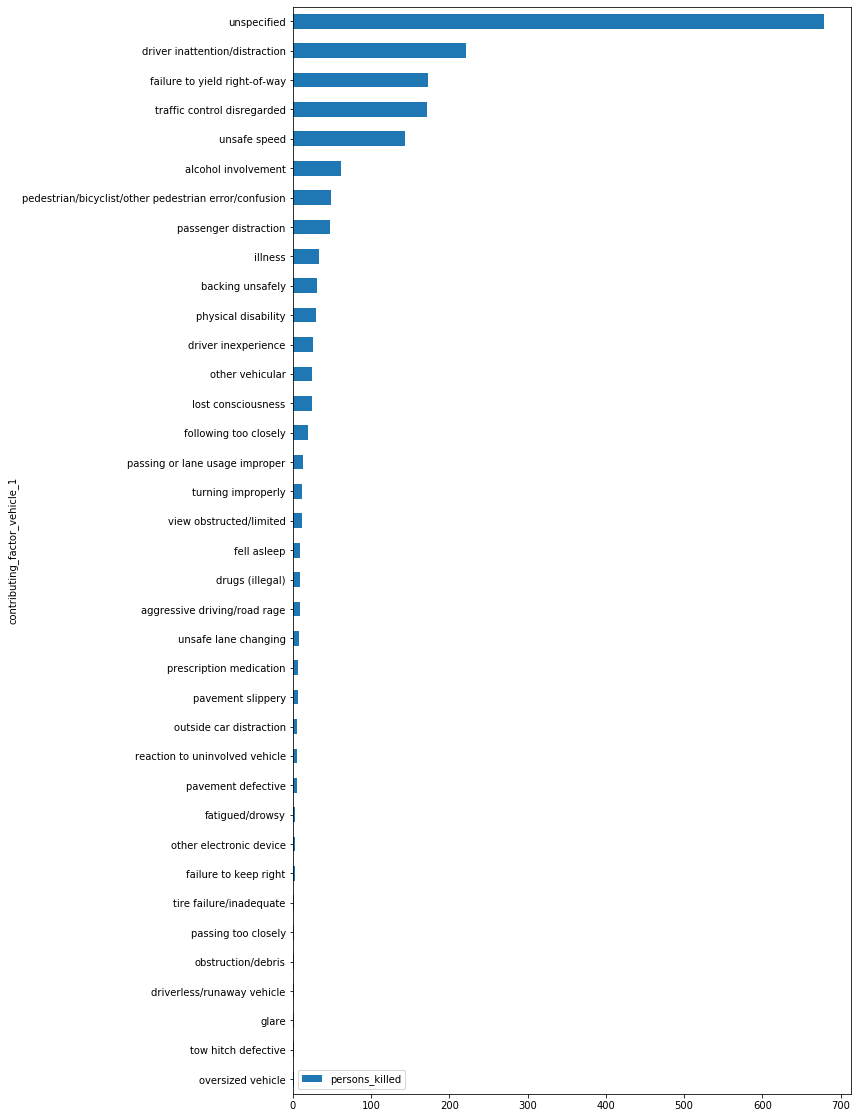

In [70]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by driver's bad behaviours, or are unrecorded.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist <a id='Fataity_Grouped_Series'></a>

We'll switch to Seaborn for the rest of our work, which allows for greater range and easier user controls.

For this we'll compare the distributions of fatalities by the category of person killed. We'll group each category from our original dataframe into it's own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [71]:
killed_motorists = clean_nyc1.groupby('date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

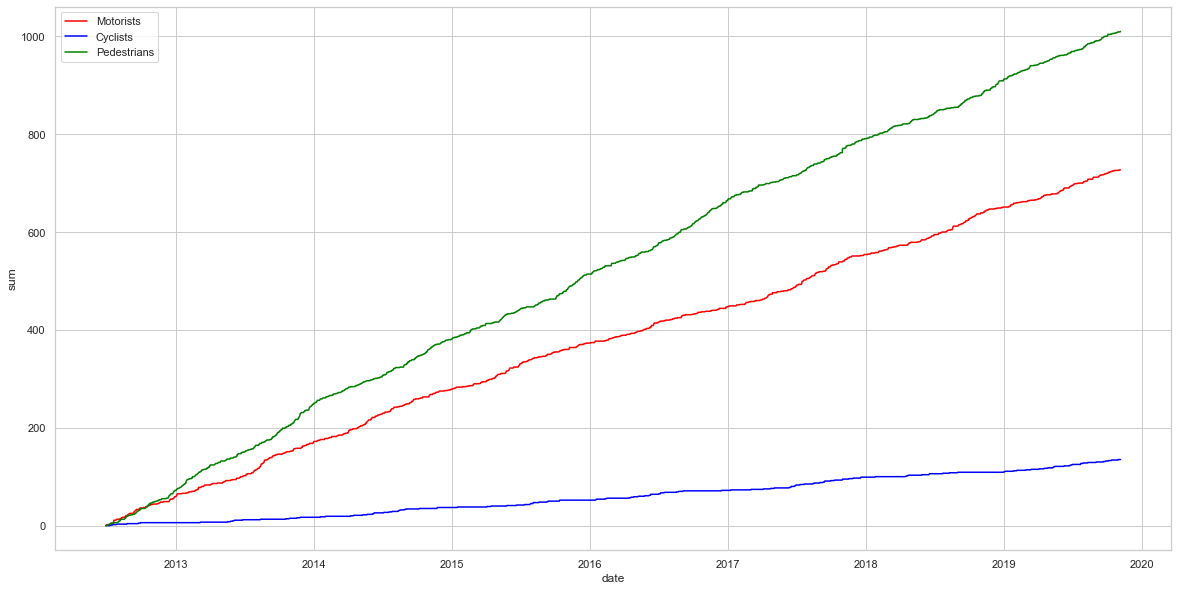

In [72]:
import seaborn as sns
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

## Number of deaths by borough <a id='Fataities_by_borough'></a>

Let's see the average of killed persons by borough with the collisions count.

In [73]:
clean_nyc1.groupby('borough').persons_killed.agg(['count', 'mean'])

,count,mean
borough,,
bronx,155377,0.001030
brooklyn,346251,0.001149
manhattan,268076,0.000824
queens,296966,0.001209
staten island,48410,0.001343


Let's graph this with a bar chart.

Text(0.5, 0, ' ')

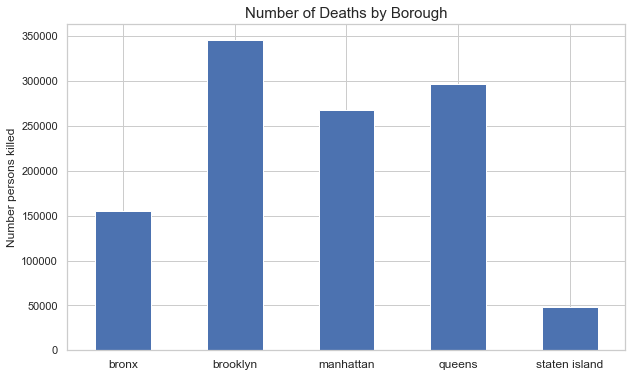

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.count().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

It looks like Staten Island and Queens have the highest probability of death, meanwhile Manhattan has the lowest, which may be due to its smaller size.

## Number of deaths by hour  <a id='Fataities_by_hour'></a>

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. To do so, we will first drop the missing values in the 'date' and 'time' columns and change their data types from integer to string. Then, create a new column named 'combined', which will combine 'date' and 'time' columns into the same panda series. Finally, take that series and convert it to datetime data type and store it in a new column called 'combined_date_time'. That will allow us to get the hours when graphing it.

In [75]:
clean_nyc1.dropna(subset = ['date'], how='all', inplace=True)
clean_nyc1.dropna(subset = ['time'], how='all', inplace=True)
clean_nyc1['date'] = clean_nyc1.date.astype(str)
clean_nyc1['time'] = clean_nyc1.time.astype(str)
clean_nyc1.head()

,date,time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2013-06-30,2019-11-10 16:40:00,NaN,nan,0.000000,0.000000,2,0,0,0,0,0,2,0,fatigued/drowsy,unspecified,suv,sport utility / station wagon,16,Summer
1,2019-05-20,2019-11-10 17:40:00,NaN,nan,0.000000,0.000000,1,0,0,0,0,0,1,0,unsafe lane changing,unsafe lane changing,motorcycle,sedan,17,Spring
2,2014-12-12,2019-11-10 21:32:00,NaN,nan,0.000000,0.000000,0,0,0,0,0,0,0,0,lost consciousness,unspecified,passenger vehicle,large com veh(6 or more tires),21,Winter
3,2018-09-14,2019-11-10 21:54:00,bronx,10472.0,0.000000,0.000000,0,0,0,0,0,0,0,0,unsafe lane changing,following too closely,sedan,sedan,21,Autumn
4,2012-07-01,2019-11-10 09:57:00,manhattan,10065.0,40.765242,-73.957868,0,0,0,0,0,0,0,0,other vehicular,other vehicular,passenger vehicle,taxi,9,Summer


In [76]:
combined = clean_nyc1.date.str.cat(clean_nyc.time, sep= ' ')
combined.head()

0    2013-06-30 16:40
1    2019-05-20 17:40
2    2014-12-12 21:32
3    2018-09-14 21:54
4     2012-07-01 9:57
Name: date, dtype: object

In [77]:
clean_nyc1['combined_date_time'] = pd.to_datetime(combined)

In [78]:
clean_nyc1.dtypes

date                                     object
time                                     object
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
persons_injured                           int64
persons_killed                            int64
pedestrians_injured                       int64
pedestrians_killed                        int64
cyclist_injured                           int64
cyclist_killed                            int64
motorist_injured                          int64
motorist_killed                           int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
vehicle_type_code_1                      object
vehicle_type_code_2                      object
hour                                      int64
season                                   object
combined_date_time               datetim

Text(0.5, 0, 'time')

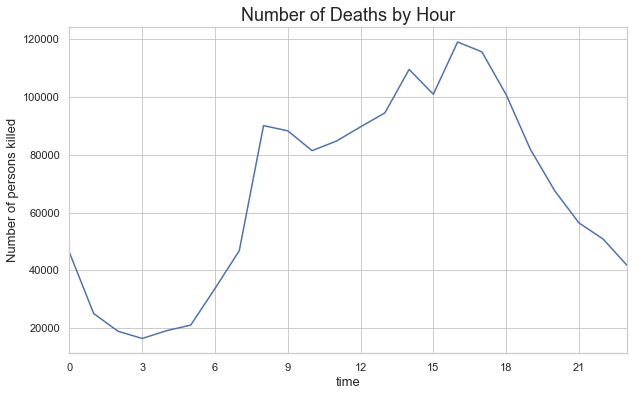

In [79]:
clean_nyc1.groupby(clean_nyc1.combined_date_time.dt.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Deaths by Hour', fontsize=18)
plt.ylabel('Number of persons killed', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like number of deaths goes up around 4:00 in the morning and 23:00 in the evening. It decreases during the day between 8:00 and 14:00, which are typical work hours.

## Crash Factor Percentages in Queens <a id='queens_crash_causes'></a>

Let's check out our data

In [80]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         346251
queens           296966
manhattan        268076
bronx            155377
staten island     48410
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.


I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first vehicle involved in the crash. 

In [81]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data

,borough,contributing_factor_vehicle_1
9,queens,unspecified
10,queens,unspecified
14,queens,unspecified
21,queens,unspecified
26,queens,unspecified
34,queens,unspecified
36,queens,unspecified
37,queens,unspecified
38,queens,unspecified
39,queens,view obstructed/limited


For this data, what are the numbers for each contributing factor. 

In [82]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

unspecified                                              114630
driver inattention/distraction                            59596
failure to yield right-of-way                             24157
backing unsafely                                          15108
following too closely                                      9520
fatigued/drowsy                                            6217
passing or lane usage improper                             6158
turning improperly                                         5726
passing too closely                                        5580
traffic control disregarded                                5463
other vehicular                                            4911
driver inexperience                                        4127
alcohol involvement                                        3261
prescription medication                                    3030
pavement slippery                                          2952
lost consciousness                      

Now we will find the percentage contribution of each factor for the burough Queens and the first vehicle involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [83]:
total_reason_counts = reason_counts.sum()
total_reason_counts

296332

In [84]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

unspecified                                              38.682964
driver inattention/distraction                           20.111227
failure to yield right-of-way                             8.152005
backing unsafely                                          5.098336
following too closely                                     3.212613
fatigued/drowsy                                           2.097985
passing or lane usage improper                            2.078075
turning improperly                                        1.932292
passing too closely                                       1.883023
traffic control disregarded                               1.843540
other vehicular                                           1.657263
driver inexperience                                       1.392695
alcohol involvement                                       1.100455
prescription medication                                   1.022502
pavement slippery                                         0.99

The greatest impact to crash was unspecified. Driver Inattention/Distraction contributed to about 20% of crashes and failure to yield right-of-way contributed 8%. All remaining factors each contributed 5% or less to crashes. 

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

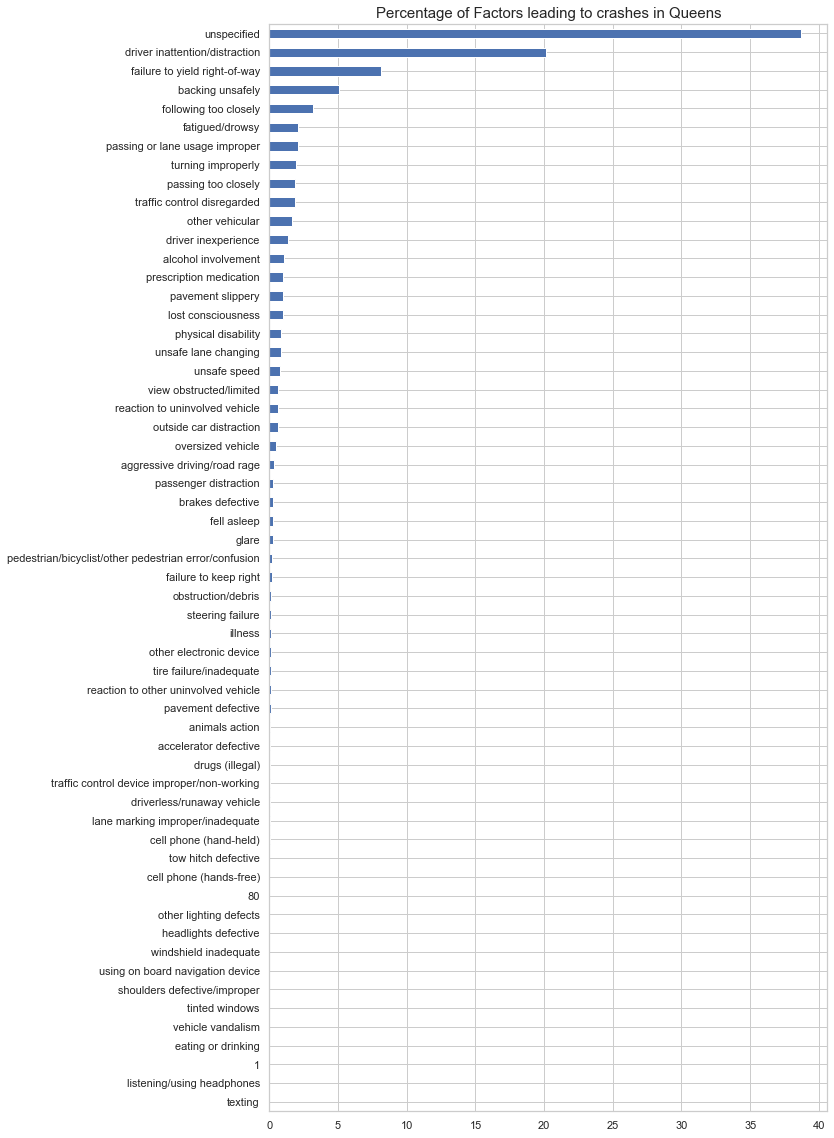

In [85]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Begining of the page](#Top)</center> <a id='Bottom'></a>